# Import Libraries

In [4]:
import os
import sys

util_path = os.path.abspath(os.path.join('..'))

if util_path not in sys.path:
    sys.path.append(util_path)

import utility_func as util
import importlib
importlib.reload(util)

<module 'utility_func' from 'D:\\GitUpload\\CMT-GSC-AI\\utility_func.py'>

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [6]:
curr_dir = (os.getcwd()).replace('\\', '/')
data_path = (os.path.join(curr_dir, 'Data')).replace('\\', '/')

In [7]:
str_sed_data = util.pd.read_csv(data_path + '/Kodangal dataset/proc_elem_Kodangal_gcM.csv')

In [8]:
str_sed_data.head()

,gid,objectid,sampleno,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,...,hf,ta,w,u,toposheet,in_,f,te,tl,hg
0,274643,276298,56G04/014/SS/18-19,77.25,17.00904,44.750,10.930,3.312,0.560,6.20,...,5.746369,0.862203,0.991997,1.811020,56G04,0.052741,322.0,0.101815,0.293517,17.0
1,274657,276312,56G04/028/SS/18-19,77.25,17.02711,45.129,10.930,3.748,0.580,6.20,...,7.857656,0.958655,0.943758,2.203597,56G04,0.048799,336.0,0.072979,0.300787,8.0
2,274671,276326,56G04/042/SS/18-19,77.25,17.04518,58.283,12.534,7.768,1.321,2.91,...,8.728652,1.428838,1.682294,2.711943,56G04,0.126064,205.0,0.121959,0.481961,12.0
3,274685,276340,56G04/056/SS/18-19,77.25,17.06325,61.180,11.670,8.340,1.420,2.43,...,9.365000,1.542800,1.803219,2.982200,56G04,0.084033,230.0,0.071592,0.427797,10.0
4,274699,276354,56G04/070/SS/18-19,77.25,17.08132,60.300,11.470,8.270,1.430,1.99,...,10.693400,1.467300,1.451395,3.249200,56G04,0.083470,300.0,0.067475,0.447018,7.0


# EDA

In [9]:
str_elem = util.elem_list(str_sed_data)

In [10]:
len(str_elem)

61

In [11]:
elem_df = str_sed_data[str_elem]
elem_df.head()

,sio2,al2o3,fe2o3,tio2,cao,mgo,mno,na2o,k2o,p2o5,...,lu,hf,ta,w,u,in_,f,te,tl,hg
0,44.750,10.930,3.312,0.560,6.20,1.573,0.073,0.152,1.258,0.129,...,0.335326,5.746369,0.862203,0.991997,1.811020,0.052741,322.0,0.101815,0.293517,17.0
1,45.129,10.930,3.748,0.580,6.20,1.480,0.109,0.167,1.207,0.080,...,0.391008,7.857656,0.958655,0.943758,2.203597,0.048799,336.0,0.072979,0.300787,8.0
2,58.283,12.534,7.768,1.321,2.91,1.912,0.192,0.050,0.800,0.061,...,0.508111,8.728652,1.428838,1.682294,2.711943,0.126064,205.0,0.121959,0.481961,12.0
3,61.180,11.670,8.340,1.420,2.43,1.710,0.180,0.250,0.660,0.080,...,0.531900,9.365000,1.542800,1.803219,2.982200,0.084033,230.0,0.071592,0.427797,10.0
4,60.300,11.470,8.270,1.430,1.99,1.610,0.170,0.230,0.580,0.061,...,0.524000,10.693400,1.467300,1.451395,3.249200,0.083470,300.0,0.067475,0.447018,7.0


# Normalize

In [12]:
train_df = elem_df.copy()
target = elem_df['zr']
train_df.drop(['zr'], axis=1, inplace=True)

In [13]:
train_df.shape

(588, 60)

In [14]:
rs = util.RobustScaler()
norm_data = rs.fit_transform(train_df)

In [15]:
n_samples = len(train_df)
n_features = len(train_df.columns)
train_df = norm_data.reshape((n_samples, n_features, 1))
train_df.shape

(588, 60, 1)

In [16]:
X_train, X_test, y_train, y_test = util.train_test_split(train_df, 
                                                         target, 
                                                         test_size=0.1, 
                                                         random_state=42,
                                                         shuffle=True)

In [17]:
X_train, X_val, y_train, y_val = util.train_test_split(X_train, 
                                                       y_train, 
                                                       test_size=0.1, 
                                                       random_state=42,
                                                       shuffle=True)

# Model Training

## CNN

In [17]:
def cnn_model(n_features, learning_rate):
    
    model = util.Sequential()

    model.add(util.Conv1D(32, kernel_size=3, padding='same', input_shape=(n_features, 1), activation='relu'))
    model.add(util.BatchNormalization())
    model.add(util.MaxPool1D())
    model.add(util.Dropout(0.5))

    model.add(util.Conv1D(64, kernel_size=3, padding='same', activation='relu'))
    model.add(util.BatchNormalization())
    model.add(util.MaxPool1D())
    model.add(util.Dropout(0.3))

    model.add(util.Conv1D(128, kernel_size=3, padding='same', activation='relu'))
    model.add(util.BatchNormalization())
    model.add(util.MaxPool1D())
    model.add(util.Dropout(0.3))

    model.add(util.Conv1D(256, kernel_size=3, padding='same', activation='relu'))
    model.add(util.BatchNormalization())
    model.add(util.MaxPool1D())
    model.add(util.Dropout(0.3))

    model.add(util.Conv1D(512, kernel_size=3, padding='same', activation='relu'))
    model.add(util.BatchNormalization())
    model.add(util.MaxPool1D())
    model.add(util.Dropout(0.5))

    model.add(util.Dense(32, activation='relu'))
    model.add(util.Dense(64, activation='relu'))
    model.add(util.Dense(128, activation='relu'))
    model.add(util.Dense(256, activation='relu'))
    model.add(util.Dense(1))

    opt = util.Adam(learning_rate)
    model.compile(optimizer=opt, loss='mae')

    return model

In [18]:
lr = 0.001

lr_schdlr = util.ExponentialDecay(initial_learning_rate=lr, 
                                  decay_steps=100, 
                                  decay_rate=0.96, 
                                  staircase=True)

In [19]:
model = cnn_model(n_features, lr_schdlr)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 60, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 60, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 30, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 15, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 15, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 7, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 7, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 7, 256)              │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 7, 256)              │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 3, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 3, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 3, 512)              │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 3, 512)              │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 1, 512)              │              

 Total params: 587,425 (2.24 MB)

 Trainable params: 585,441 (2.23 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [20]:
cnnmodel = model.fit(X_train, y_train, 
                     epochs=100, batch_size=32, 
                     validation_data=(X_val, y_val))

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 604.9619 - val_loss: 516.2814
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 481.4413 - val_loss: 384.6797
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 243.4591 - val_loss: 398.3528
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 192.3796 - val_loss: 367.7941
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 195.0551 - val_loss: 299.8547
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 176.1336 - val_loss: 293.9200
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 156.0439 - val_loss: 292.9541
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 155.8651 - val_loss: 276.2176
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 144.6314 - val_loss: 231.5278
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 147.6384 - val_loss: 222.4383
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 140.0918 - val_loss: 201.0312
Epoch 12

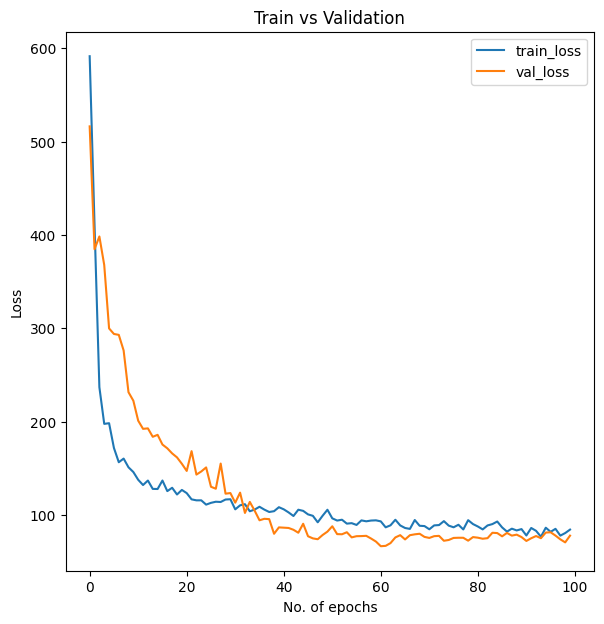

In [22]:
util.metrics_graph(cnnmodel, 100)

In [23]:
## Save the model
model.save(curr_dir + '/Models/Kodangal/CNNModel_zr.keras')
print('Saved sample model to disk')

Saved sample model to disk


In [18]:
model = util.tf.keras.models.load_model(curr_dir + '/Models/Kodangal/CNNModel_zr.keras')

In [23]:
a = util.np.expand_dims(X_test[0], axis=0)
a.shape

(1, 60, 1)

In [25]:
y = model.predict(a)
y

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[[332.8387]]], dtype=float32)

In [19]:
pred_catg, bins, y_pred = util.predict(model, X_test, y_train, 5)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
(59, 1, 1)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [36]:
bins

array([ 198.45,  327.1 ,  435.1 ,  572.19,  828.5 , 1496.  ])

In [37]:
catg = list(set(pred_catg))
catg

['40-60%', '20-40%', '80-100%', '0-20%', '60-80%']

In [38]:
def extract_lower_bound(range_str):
    # Extract the first number using regular expressions
    return int(util.re.findall(r'\d+', range_str)[0])

catg = sorted(catg, key=extract_lower_bound)

bins_range = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

ppm_conc_cu = util.pd.DataFrame({
    'ppm' : bins_range,
    '% range' : catg
})
ppm_conc_cu

,ppm,% range
0,198.45-327.1,0-20%
1,327.1-435.1,20-40%
2,435.1-572.19,40-60%
3,572.19-828.5,60-80%
4,828.5-1496.0,80-100%


In [39]:
plot_vals = util.pd.DataFrame({
    'Identifier': y_test.index,
    'Actual': y_test,
    'Predicted': y_pred
})

plot_vals = plot_vals.sort_values(by='Identifier')

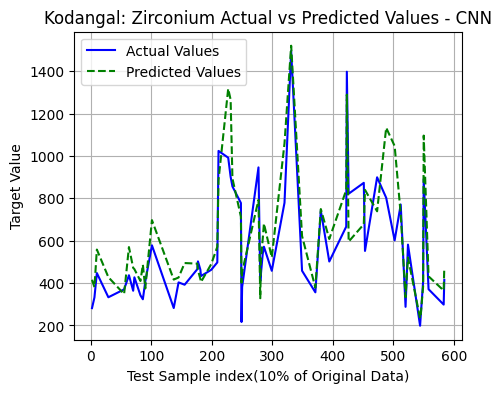

In [40]:
util.plt.figure(figsize=(5, 4))
util.plt.plot(plot_vals['Actual'], label='Actual Values', color='blue')
util.plt.plot(plot_vals['Predicted'], label='Predicted Values', color='green', linestyle='--')
util.plt.title('Kodangal: Zirconium Actual vs Predicted Values - CNN')
util.plt.xlabel('Test Sample index(10% of Original Data)')
util.plt.ylabel('Target Value')
util.plt.legend()
util.plt.grid(True)
util.plt.show()

# CNN for Features from RFECV

In [49]:
features = util.pd.read_excel(data_path+'/Kodangal dataset/Kodangal_element_names.xlsx', sheet_name='Zirconium')

In [50]:
fs_elem_df = elem_df[features['Elements']]
fs_elem_df.head()

,sio2,cao,mgo,na2o,k2o,p2o5,ba,ga,th,pb,...,ce,eu,tb,ho,yb,lu,hf,u,te,tl
0,44.750,6.20,1.573,0.152,1.258,0.129,727.47,13.43,10.226817,6.80,...,43.092277,0.922811,0.642651,0.730026,2.328765,0.335326,5.746369,1.811020,0.101815,0.293517
1,45.129,6.20,1.480,0.167,1.207,0.080,891.11,13.06,11.413039,12.59,...,51.744889,1.042359,0.730845,0.864915,2.507587,0.391008,7.857656,2.203597,0.072979,0.300787
2,58.283,2.91,1.912,0.050,0.800,0.061,627.92,18.57,17.190245,23.21,...,87.110378,1.441983,1.017285,1.115141,3.374422,0.508111,8.728652,2.711943,0.121959,0.481961
3,61.180,2.43,1.710,0.250,0.660,0.080,525.90,18.40,17.002600,27.90,...,95.359600,1.545100,1.441500,1.129100,3.406600,0.531900,9.365000,2.982200,0.071592,0.427797
4,60.300,1.99,1.610,0.230,0.580,0.061,509.60,18.50,16.229300,25.90,...,94.361800,1.418500,1.367600,1.055800,3.419200,0.524000,10.693400,3.249200,0.067475,0.447018


# Normalize

In [51]:
fs_train_df = fs_elem_df.copy()

In [52]:
fs_train_df.shape

(588, 30)

In [53]:
rs = util.RobustScaler()
fs_norm_data = rs.fit_transform(fs_train_df)

In [54]:
n_samples = len(fs_train_df)
n_features = len(fs_train_df.columns)
fs_train_df = fs_norm_data.reshape((n_samples, n_features, 1))
fs_train_df.shape

(588, 30, 1)

In [55]:
X_train, X_test, y_train, y_test = util.train_test_split(fs_train_df, 
                                                         target, 
                                                         test_size=0.1, 
                                                         random_state=42,
                                                         shuffle=True)

In [56]:
X_train, X_val, y_train, y_val = util.train_test_split(X_train, 
                                                       y_train, 
                                                       test_size=0.1, 
                                                       random_state=42,
                                                       shuffle=True)

# Model Training

## CNN

In [81]:
def cnn_model(n_features, learning_rate):
    
    model = util.Sequential()

    model.add(util.Conv1D(32, kernel_size=3, padding='same', input_shape=(n_features, 1), activation='relu'))
    model.add(util.BatchNormalization())
    model.add(util.MaxPool1D())
    model.add(util.Dropout(0.5))

    model.add(util.Conv1D(64, kernel_size=3, padding='same', activation='relu'))
    model.add(util.BatchNormalization())
    model.add(util.MaxPool1D())
    model.add(util.Dropout(0.3))

    model.add(util.Conv1D(128, kernel_size=3, padding='same', activation='relu'))
    model.add(util.BatchNormalization())
    model.add(util.MaxPool1D())
    model.add(util.Dropout(0.3))

    model.add(util.Conv1D(256, kernel_size=3, padding='same', activation='relu'))
    model.add(util.BatchNormalization())
    model.add(util.MaxPool1D())
    model.add(util.Dropout(0.3))

    # model.add(util.Conv1D(512, kernel_size=3, padding='same', activation='relu'))
    # model.add(util.BatchNormalization())
    # model.add(util.MaxPool1D())
    model.add(util.Dropout(0.3))

    model.add(util.Dense(32, activation='relu'))
    model.add(util.Dense(64, activation='relu'))
    model.add(util.Dense(128, activation='relu'))
    model.add(util.Dense(256, activation='relu'))
    model.add(util.Dense(1))

    opt = util.Adam(learning_rate)
    model.compile(optimizer=opt, loss='mae')

    return model

In [82]:
lr = 0.001

lr_schdlr = util.ExponentialDecay(initial_learning_rate=lr, 
                                  decay_steps=100, 
                                  decay_rate=0.96, 
                                  staircase=True)

In [83]:
model = cnn_model(n_features, lr_schdlr)
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_26 (Conv1D)                   │ (None, 30, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 30, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_26 (MaxPooling1D)      │ (None, 15, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 15, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_27 (Conv1D)                   │ (None, 15, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 15, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_27 (MaxPooling1D)      │ (None, 7, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 7, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_28 (Conv1D)                   │ (None, 7, 128)              │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 7, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_28 (MaxPooling1D)      │ (None, 3, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 3, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_29 (Conv1D)                   │ (None, 3, 256)              │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 3, 256)              │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_29 (MaxPooling1D)      │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1, 32)               │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1, 64)               │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 183,457 (716.63 KB)

 Trainable params: 182,497 (712.88 KB)

 Non-trainable params: 960 (3.75 KB)

In [84]:
fs_cnnmodel = model.fit(X_train, y_train, 
                        epochs=100, batch_size=32, 
                        validation_data=(X_val, y_val))

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 596.6100 - val_loss: 517.0975
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 519.3087 - val_loss: 483.7861
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 285.3219 - val_loss: 406.9184
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 203.1555 - val_loss: 357.4414
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 196.1857 - val_loss: 318.8214
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 166.1980 - val_loss: 273.5829
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 160.1054 - val_loss: 262.4457
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 153.2525 - val_loss: 252.6579
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 149.9615 - val_loss: 215.9058
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 163.6850 - val_loss: 224.5094
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 140.8455 - val_loss: 197.9746
Epoch 12/100
15/

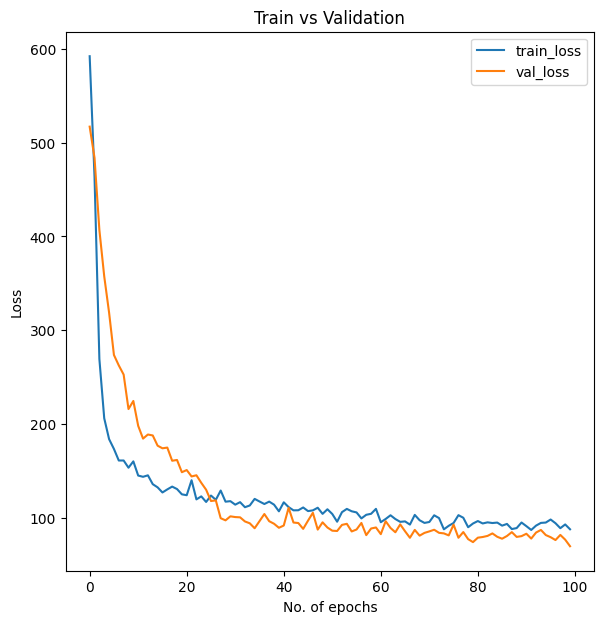

In [85]:
util.metrics_graph(fs_cnnmodel, 100)

In [86]:
## Save the model
model.save(curr_dir + '/Models/Kodangal/fs_CNNModel_zr.keras')
print('Saved sample model to disk')

Saved sample model to disk


In [87]:
pred_catg, bins, y_pred = util.predict(model, X_test, y_train, 5)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


In [88]:
bins

array([ 198.45,  327.1 ,  435.1 ,  572.19,  828.5 , 1496.  ])

In [89]:
catg = list(set(pred_catg))
catg

['40-60%', '20-40%', '80-100%', '0-20%', '60-80%']

In [90]:
def extract_lower_bound(range_str):
    # Extract the first number using regular expressions
    return int(util.re.findall(r'\d+', range_str)[0])

catg = sorted(catg, key=extract_lower_bound)

bins_range = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

ppm_conc_cu = util.pd.DataFrame({
    'ppm' : bins_range,
    '% range' : catg
})
ppm_conc_cu

,ppm,% range
0,198.45-327.1,0-20%
1,327.1-435.1,20-40%
2,435.1-572.19,40-60%
3,572.19-828.5,60-80%
4,828.5-1496.0,80-100%


In [91]:
plot_vals = util.pd.DataFrame({
    'Identifier': y_test.index,
    'Actual': y_test,
    'Predicted': y_pred
})

plot_vals = plot_vals.sort_values(by='Identifier')

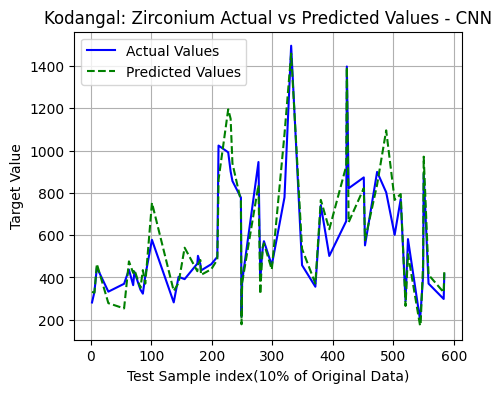

In [92]:
util.plt.figure(figsize=(5, 4))
util.plt.plot(plot_vals['Actual'], label='Actual Values', color='blue')
util.plt.plot(plot_vals['Predicted'], label='Predicted Values', color='green', linestyle='--')
util.plt.title('Kodangal: Zirconium Actual vs Predicted Values - CNN')
util.plt.xlabel('Test Sample index(10% of Original Data)')
util.plt.ylabel('Target Value')
util.plt.legend()
util.plt.grid(True)
util.plt.show()